In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [81]:
df=pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


<Axes: >

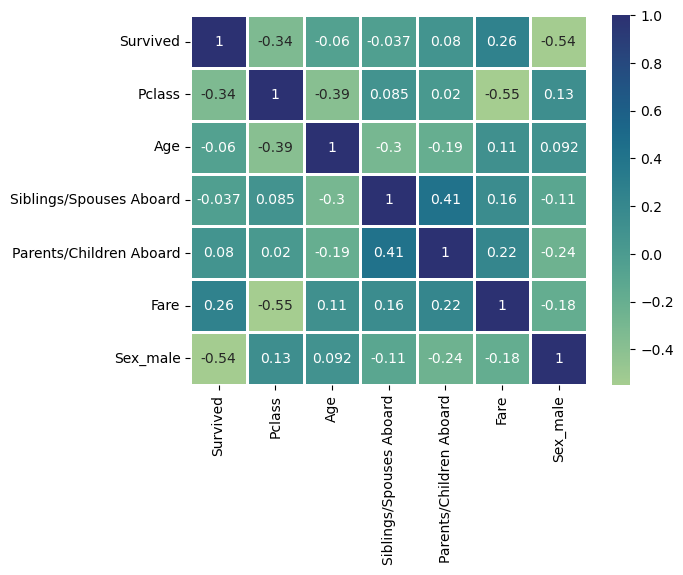

In [83]:
df1=pd.get_dummies(df.drop(columns='Name'),drop_first=True,dtype=int)
data1=df1.corr(numeric_only=True)
sns.heatmap(data=data1,annot=True,cmap='crest',linewidths=1,linecolor='White')

In [86]:
y=df1['Survived']
x=df1.drop(columns='Survived',)
x=sm.add_constant(x)
x

,const,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,1.0,3,22.0,1,0,7.2500,1
1,1.0,1,38.0,1,0,71.2833,0
2,1.0,3,26.0,0,0,7.9250,0
3,1.0,1,35.0,1,0,53.1000,0
4,1.0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
882,1.0,2,27.0,0,0,13.0000,1
883,1.0,1,19.0,0,0,30.0000,0
884,1.0,3,7.0,1,2,23.4500,0
885,1.0,1,26.0,0,0,30.0000,1


In [87]:
#Tạo test sample và train sample
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1502)

In [88]:
model=sm.Logit(endog=y_train,exog=x_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.405125
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  709
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            6
Date:                Fri, 01 Mar 2024   Pseudo R-squ.:                  0.3915
Time:                        14:13:41   Log-Likelihood:                -287.23
converged:                       True   LL-Null:                       -472.06
Covariance Type:            nonrobust   LLR p-value:                 9.247e-77
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       6.2418      0.686      9.101      0.000       4.898   

In [92]:
y_pred=model.predict(x_test)
y_pred
y_pred=np.where(y_pred>0.5,1,0)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0])

In [93]:
#Tạo test sample và train sample
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))
#Model này sử dụng cho Logistics regression, K_min clustering,..

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       108
           1       0.65      0.63      0.64        70

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178



In [94]:
y_test.mean()

0.39325842696629215